# import required library and read data

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data Processed/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,37,41,20.879744,82.002744,6.502985,202.935536,rice
1,97,43,37,21.770462,80.319644,7.038096,226.655537,rice
2,79,52,44,23.004459,82.320763,7.840207,263.964248,rice
3,83,49,40,26.491096,80.158363,6.980401,242.864034,rice
4,69,56,35,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,94,25,29,26.774637,66.413269,6.780064,177.774507,coffee
2196,105,16,32,27.417112,56.636362,6.086922,127.924610,coffee
2197,103,18,27,24.131797,67.225123,6.362608,173.322839,coffee
2198,110,36,27,26.272418,52.127394,6.758793,127.175293,coffee
2199,107,24,31,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
df.shape

(2200, 8)

In [9]:
df.size

17600

In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.469545,53.164091,48.265455,25.616244,71.481779,6.469480,103.463655
std,37.004762,32.756490,50.643333,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,21.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,85.000000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
print("Unique Values in Label:",df['label'].unique())
print()

Unique Values in Label: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']



In [13]:
df['label'].value_counts()

apple          100
pigeonpeas     100
grapes         100
coffee         100
blackgram      100
chickpea       100
coconut        100
banana         100
watermelon     100
orange         100
mango          100
muskmelon      100
mungbean       100
rice           100
papaya         100
maize          100
pomegranate    100
jute           100
mothbeans      100
cotton         100
kidneybeans    100
lentil         100
Name: label, dtype: int64

In [14]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Data Analysis

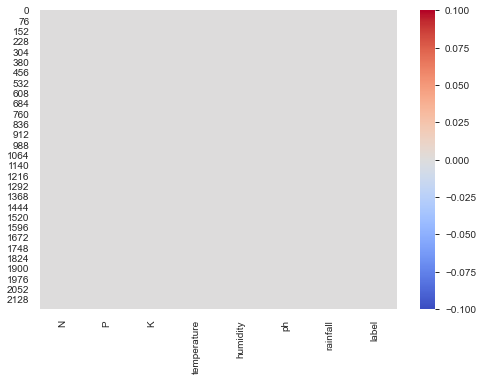

In [15]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Density'>

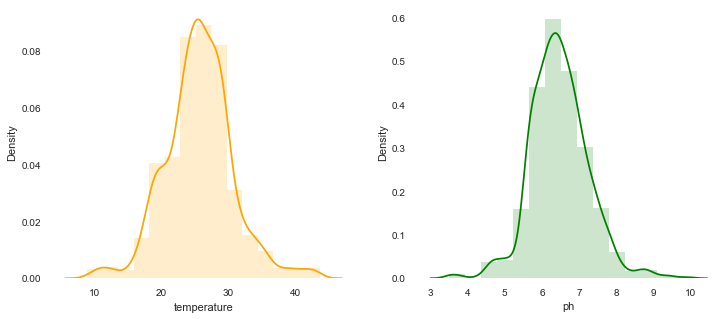

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(df['temperature'],color="orange",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<AxesSubplot:xlabel='count', ylabel='label'>

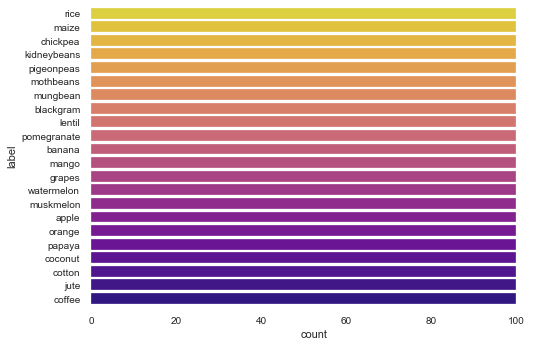

In [17]:
sns.countplot(y='label',data=df, palette="plasma_r")

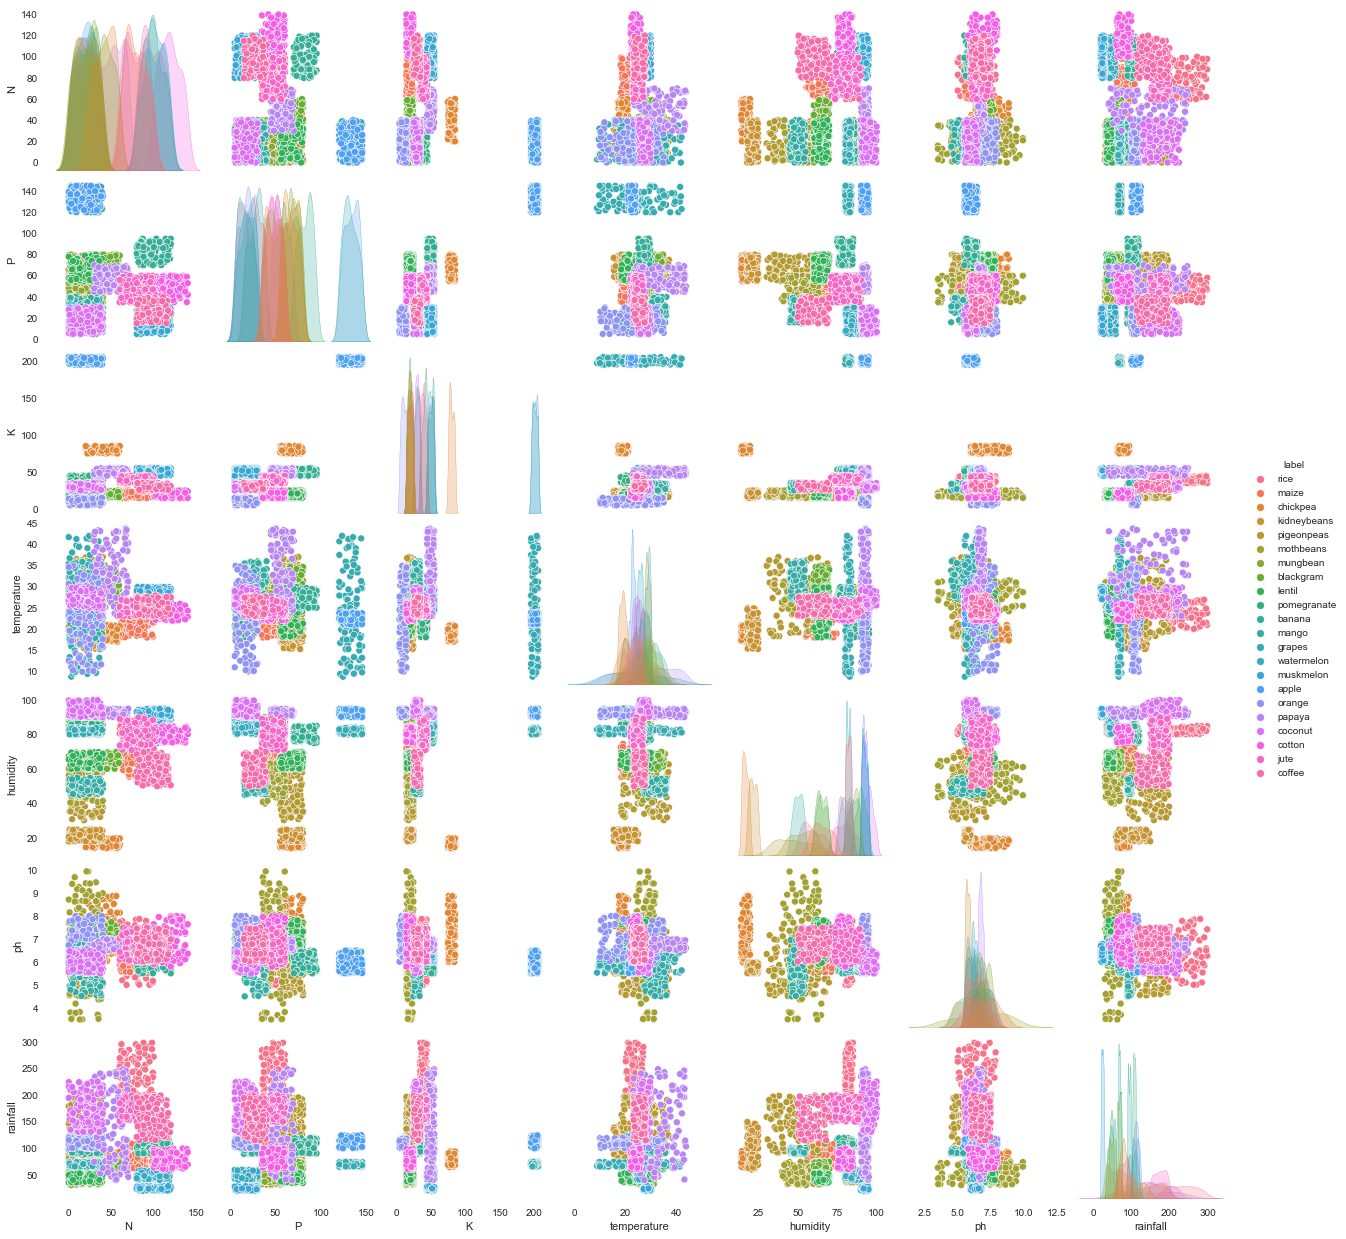

In [18]:
sns.pairplot(df, hue = 'label')

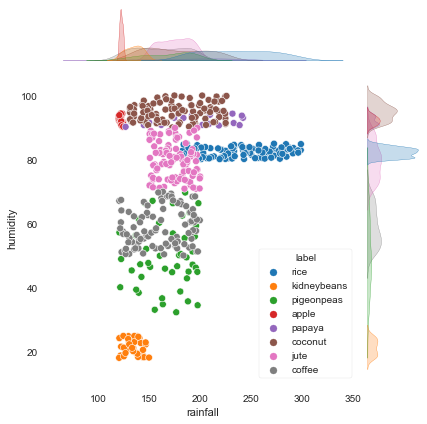

In [19]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

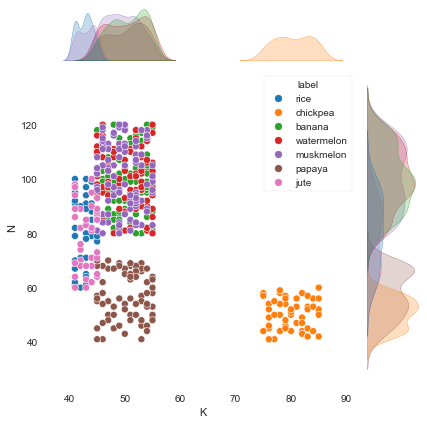

In [20]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

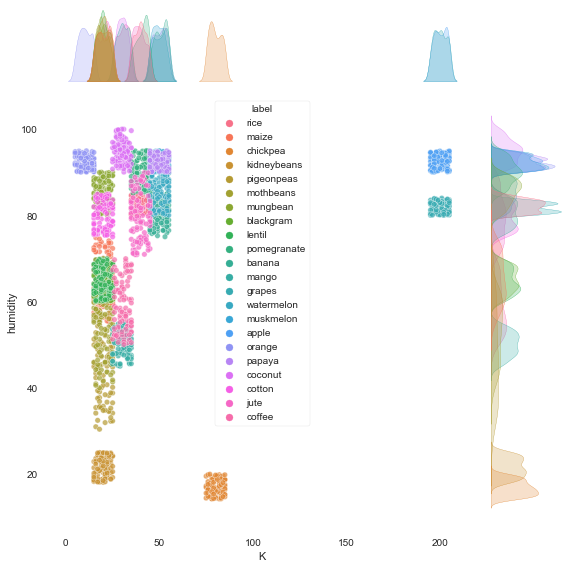

In [21]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

<AxesSubplot:xlabel='ph', ylabel='label'>

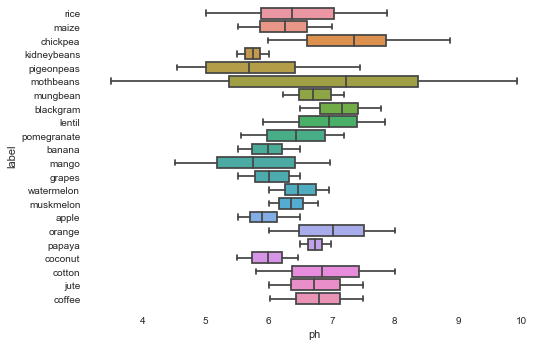

In [22]:
sns.boxplot(y='label',x='ph',data=df)

<AxesSubplot:xlabel='P', ylabel='label'>

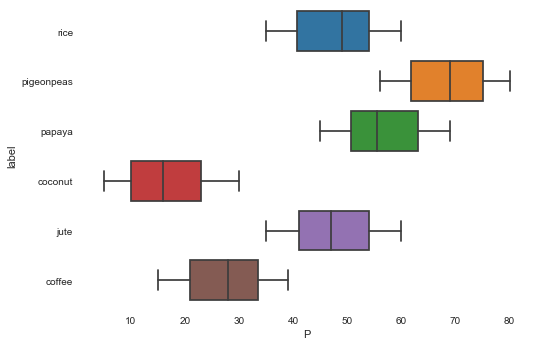

In [23]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

<AxesSubplot:xlabel='K', ylabel='rainfall'>

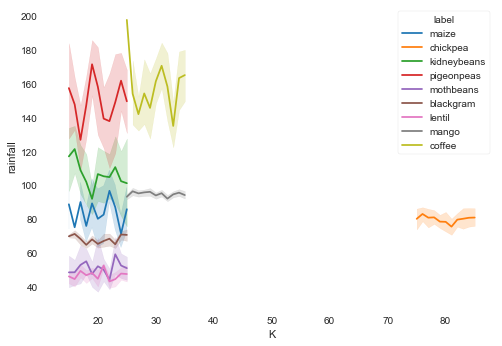

In [24]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

Text(0, 0.5, 'Crops')

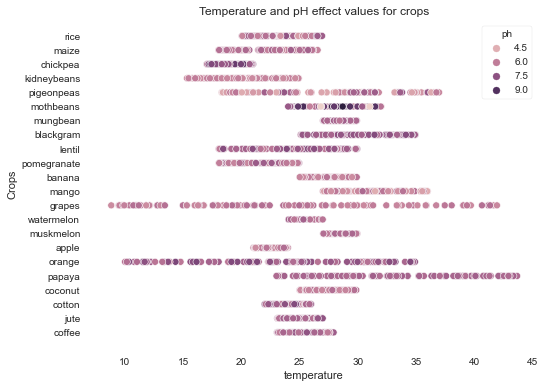

In [25]:
plt.figure(figsize=(8,6))
plt.title("Temperature and pH effect values for crops")
sns.scatterplot(data=df, x="temperature", y="label", hue="ph")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

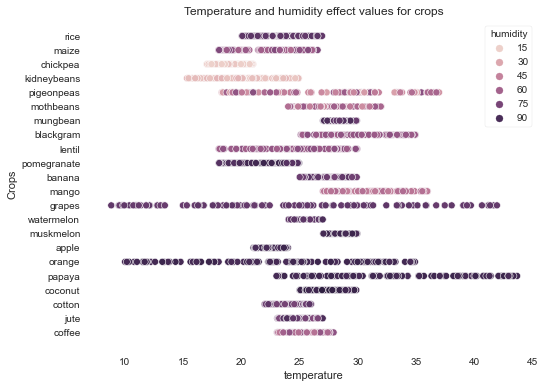

In [26]:
plt.figure(figsize=(8,6))
plt.title("Temperature and humidity effect values for crops")
sns.scatterplot(data=df, x="temperature", y="label", hue="humidity")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

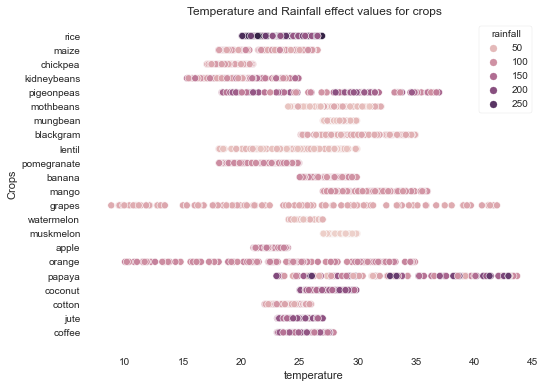

In [27]:
plt.figure(figsize=(8,6))
plt.title("Temperature and Rainfall effect values for crops")
sns.scatterplot(data=df, x="temperature", y="label", hue="rainfall")
plt.ylabel("Crops")

<AxesSubplot:>

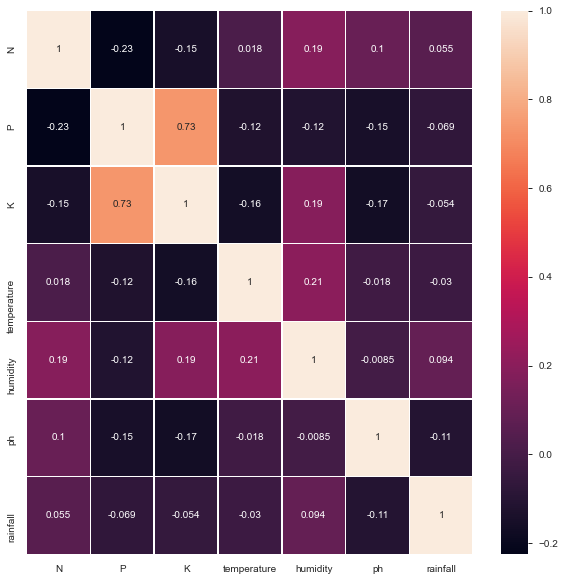

In [28]:
# Correlation
# sns.heatmap(df.corr(),annot=True)
fig, ax = plt.subplots(figsize=(10,10))        
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# Data preprocessing

In [29]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy_model = []
model = []

In [30]:
# #To change catagorical records to numarcal record
# from sklearn.preprocessing import LabelEncoder
# label_encode = LabelEncoder()

# df['label'] = label_encode.fit_transform(df['label'])
# crop_category = {index : label for index, label in enumerate(label_encode.classes_)}
# crop_category

In [31]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
print(features)
print(target)

        N   P   K  temperature   humidity        ph    rainfall
0      79  37  41    20.879744  82.002744  6.502985  202.935536
1      97  43  37    21.770462  80.319644  7.038096  226.655537
2      79  52  44    23.004459  82.320763  7.840207  263.964248
3      83  49  40    26.491096  80.158363  6.980401  242.864034
4      69  56  35    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195   94  25  29    26.774637  66.413269  6.780064  177.774507
2196  105  16  32    27.417112  56.636362  6.086922  127.924610
2197  103  18  27    24.131797  67.225123  6.362608  173.322839
2198  110  36  27    26.272418  52.127394  6.758793  127.175293
2199  107  24  31    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


In [32]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state =0)

# Rendom Forest

In [49]:
#to import and initiate RandomForest function
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=0,n_estimators=500,max_depth = 15,min_samples_leaf = 1,min_samples_split = 2)

In [50]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=0)

In [51]:
#predicting values over test dataset
pred_rf= rf_model.predict(x_test)

In [52]:
#import confusion maatrix
from sklearn.metrics import confusion_matrix
#implement of confusion matrix
rf_cm = confusion_matrix(pred_rf , y_test)
rf_cm

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

Text(66.5, 0.5, 'Truth')

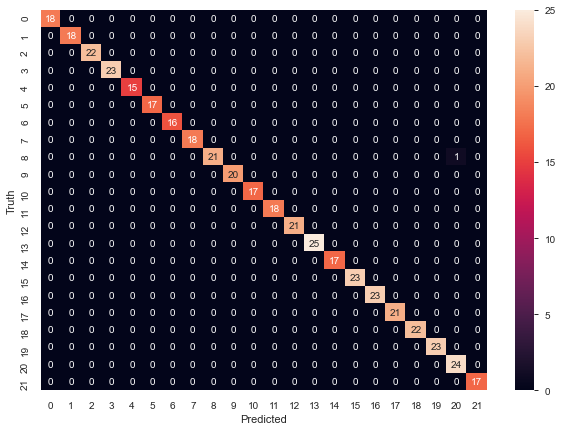

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(rf_cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
#calculate the accuracy of the model
x = metrics.accuracy_score(y_test, pred_rf)
accuracy_model.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x*100)

Random Forest's Accuracy is:  99.77272727272727


In [55]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [56]:
# Cross validation score (Random Forest)
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf_model,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [57]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/CropRandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rf_model, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# prediction

In [92]:
data = np.array([[90,42,43, 20.879744, 82.002744, 6.502985, 202.935536]])
prediction = rf_model.predict(data)
print(prediction)

['rice']


In [93]:
data = np.array([[104,18,30,23.603016,60.396475,6.779833,140.937041]])
prediction = nb_model.predict(data)
print(prediction)

['coffee']


In [94]:
data = np.array([[85,17,40,33.603016,67.396475,7.779833,120.937041]])
prediction = rf_model.predict(data)
print(prediction)

['coffee']


In [95]:
# -------------------------------------------------END-------------------------------------------------------